# [실습] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN, CNN, RNN 에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 실습준비
2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 딥러닝 모델 : DNN, CNN, RNN

# 
# 1. 실습준비

In [1]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

# 
# 2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

In [3]:
#고객등급(cust_class), 성별(sex_type), 나이(age), 사용서비스수(efct_svc_count), 서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
#3개월 평균 요금(r3m_avg_bill_amt), A서비스 3개월 평균요금(r3m_A_avg_arpu_amt), B서비스 3개월 평균요금(r3m_B_avg_arpu_amt), 해지여부(termination_yn)

df = pd.read_csv('cust_data.csv')

## ③ 데이터 분석

In [4]:
# 12컬럼, 7814 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [5]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


<AxesSubplot:>

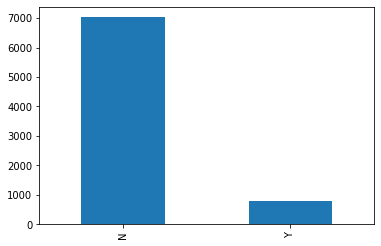

In [6]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [7]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

In [8]:
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [9]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

## ⑤ Train, Test  데이터셋 분할

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [13]:
X_train.shape

(5469, 18)

In [14]:
y_train.shape

(5469,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [15]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[:2]

array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
        0.6       , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

+ 모델 입력갯수, 출력갯수 확인

In [19]:
X_train.shape

(5469, 18)

In [20]:
y_train.shape

(5469,)

## ⑦ 모델 개발

###  
## 1) DNN

#### 
#### A. 이진 분류용 DNN layer
+ 18개 input layer
+ unit 4개 hidden layer
+ unit 3개 hidden layer 
+ 1개 output layser : 이진분류

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [22]:
# 18개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 모델 확인

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 76        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 – 이진 분류 모델

In [24]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

+ Dropout : 과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [25]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 76        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 – 이진 분류 모델

In [27]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [28]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 [==============================] - 2s 3ms/step - loss: 0.5921 - accuracy: 0.7549 - val_loss: 0.3350 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8932 - val_loss: 0.3105 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8932 - val_loss: 0.2918 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.9020 - val_loss: 0.2867 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8974 - val_loss: 0.2770 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3083 - accuracy: 0.9041 - val_loss: 0.2680 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.9016 - val_loss: 0.2609 - val_accuracy: 0.8994
Epoch 

#### 
#### B. 다중 분류용 DNN layer
+ 18개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [29]:
# 18개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 95        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 24        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 – 다중 분류 모델

In [31]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [32]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.8298 - val_loss: 0.3055 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.9057 - val_loss: 0.2924 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3240 - accuracy: 0.8997 - val_loss: 0.2855 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.9074 - val_loss: 0.2755 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.9014 - val_loss: 0.2693 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.9063 - val_loss: 0.2602 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.9017 - val_loss: 0.2507 - val_accuracy: 0.8994
Epoch 

## ⑧ 모델 성능 평가
+ 성능 시각화

In [33]:
losses = pd.DataFrame(model.history.history)

In [34]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.436308,0.875114,0.305476,0.89936
1,0.332110,0.899616,0.292417,0.89936
2,0.317411,0.899616,0.285466,0.89936
3,0.307776,0.899616,0.275516,0.89936
4,0.305095,0.899616,0.269279,0.89936


<AxesSubplot:>

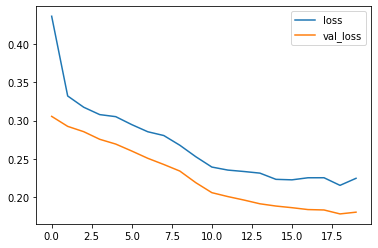

In [35]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

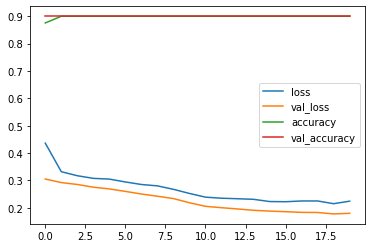

In [36]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

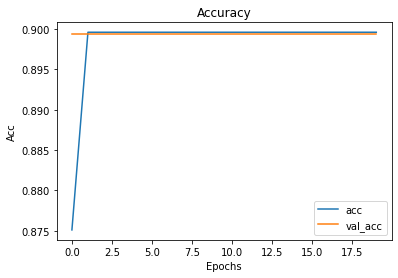

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

###  
## 2) CNN

![CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
+ [출처] https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


+ CNN은 이미지 처리에 높은 성능을 보여주고 있어 DNN에서 다뤄던 Tabular 형태의 데이터를 가지고 테스트 진행하기 어려워
+ 따로 이미지 준비하여 CNN 실습을 진행하겠습니다.

#### 업로드된 이미지 파일 가져오기

In [38]:
import os
from glob import glob
import tensorflow as tf

In [39]:
# dataset-clean,dirty.zip 파일 확인
FILENAME = 'dataset-clean_dirty.zip'
glob(FILENAME)

['dataset-clean_dirty.zip']

In [40]:
# dataset-clean_dirty.zip 파일을 IMAGE 디렉토리로 복사 및 압축 풀기
if not os.path.exists('IMAGE') :
    !mkdir IMAGE
    !cp dataset-clean_dirty.zip ./IMAGE
    !cd IMAGE ; unzip dataset-clean_dirty.zip

In [41]:
# ./IMAGE/clean 폴더 안의 이미지 갯수
!ls -l ./IMAGE/clean | grep jpg | wc -l

435


In [42]:
# ./IMAGE/clean 폴더 안의 이미지 갯수
!ls -l ./IMAGE/dirty | grep jpg | wc -l

435


#### 이미지 파일 하나 읽어 이미지 보기

In [43]:
clean_img_path = './IMAGE/clean/plastic1.jpg'

In [44]:
gfile = tf.io.read_file(clean_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [45]:
image.shape

TensorShape([384, 512, 3])

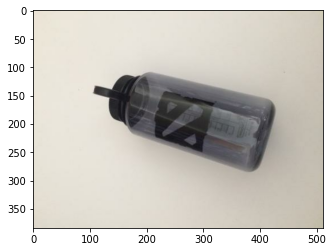

In [46]:
plt.imshow(image)
plt.show()

In [47]:
dirty_img_path = './IMAGE/dirty/dirty_plastic1.jpg'

In [48]:
gfile = tf.io.read_file(dirty_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [49]:
image.shape

TensorShape([384, 512, 3])

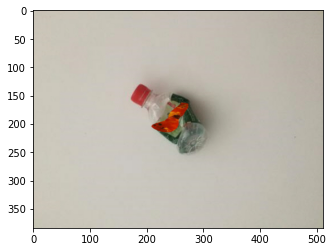

In [50]:
plt.imshow(image)
plt.show()

#### Data Preprocess
+ tensorflow ImageDataGenerator 함수 활용하여 이미지 데이터 스케일 및 트레인 데이터/ 테스트 데이트 나누기
+ flow_from_directory 함수 활용하여 나누어진 트레인 데이터와 테스트 데이터에 대해 배치 사이즈 나누고 , 셔플하고 labeling 수행

In [51]:
# Hyperparameter Tunning

num_epochs = 50 
batch_size = 4
learning_rate = 0.001

input_shape = (384, 512, 3)  # 사이즈 확인
num_classes = 2    # clean, dirty

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
# ImageDataGenerator 이용하여 이미지 전처리하기

training_datagen = ImageDataGenerator(
      rescale=1. / 255,
      validation_split=0.2     # train set : 435 * (1 - 0.2) = 348
    )

test_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2     # test set : 435 * 0.2 = 87
    )

In [54]:
# 이미지 데이터 읽고 배치 , 셔플하고 labeling 수행

# IMAGE 포더 밑에 .ipynb_checkpoints 폴더 있을경우 폴데 삭제
!rm -rf ./IMAGE/.ipynb_checkpoints

training_generator = training_datagen.flow_from_directory(
    './IMAGE/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'training'           # training, validation. validation_split 사용하므로 subset 지정
    )

test_generator = test_datagen.flow_from_directory(
    './IMAGE/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'validation'         # training, validation. validation_split 사용하므로 subset 지정
    )

Found 696 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


In [55]:
# class 이름 및 번호 매핑 확인
print(training_generator.class_indices)

{'clean': 0, 'dirty': 1}


True Value :  [1. 0.]


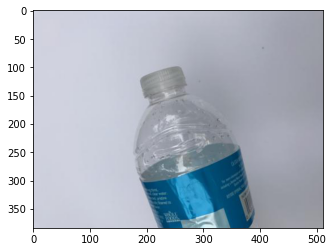

In [56]:
batch_samples = next(iter(training_generator))

print('True Value : ',batch_samples[1][0])
plt.imshow(batch_samples[0][0])   
plt.show()

#### CNN 모델링

In [57]:
#CNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [58]:
# Feature extraction
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 191, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 189, 253, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 126, 16)       0         
_________________________________________________________________
flatten (Flatten)            (None, 189504)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                9475250   
_________________________________________________________________
dense_10 (Dense)             (None, 2)                

#### 모델 컴파일 – 이진 분류 모델

In [60]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [62]:
history = model.fit(training_generator, 
          epochs=3 ,
          steps_per_epoch = len(training_generator) / batch_size,
          validation_steps = len(test_generator) / batch_size,
          validation_data=test_generator, 
          verbose=1
)

Epoch 1/3
43/43 [==============================] - 113s 3s/step - loss: 0.5930 - accuracy: 0.8693 - val_loss: 0.4915 - val_accuracy: 0.9091
Epoch 2/3
43/43 [==============================] - 115s 3s/step - loss: 0.5261 - accuracy: 0.8977 - val_loss: 0.6380 - val_accuracy: 0.7727
Epoch 3/3
43/43 [==============================] - 113s 3s/step - loss: 0.4461 - accuracy: 0.9432 - val_loss: 0.4918 - val_accuracy: 0.8409


#### **성능 시각화 - 성능평가**

In [63]:
losses = pd.DataFrame(model.history.history)

In [64]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.593012,0.869318,0.491465,0.909091
1,0.526090,0.897727,0.638033,0.772727
2,0.446147,0.943182,0.491810,0.840909


<AxesSubplot:>

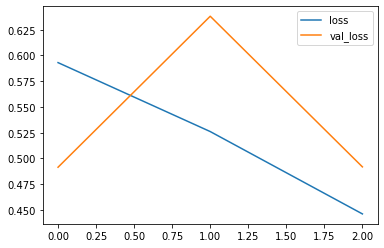

In [65]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

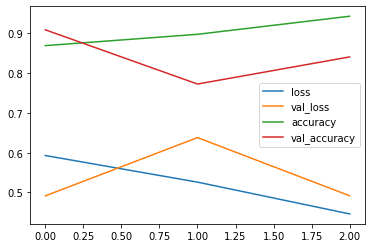

In [66]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

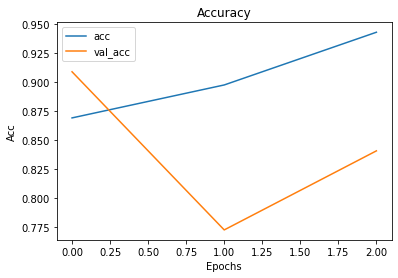

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### **예측하기**

In [68]:
# test_generator 샘플 데이터 가져오기
# 배치 사이즈 32 확인

batch_img, batch_label = next(iter(test_generator))
print(batch_img.shape)
print(batch_label.shape)

(4, 384, 512, 3)
(4, 2)


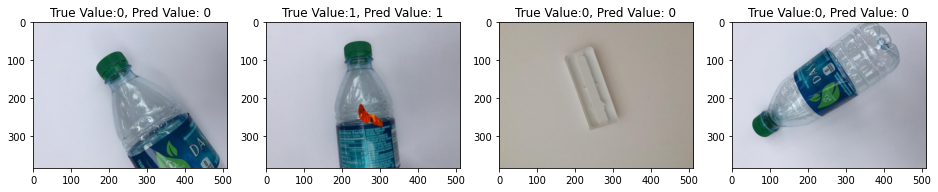

In [69]:
# 4개 Test 샘플 이미지 그려보고 예측해 보기

i = 1 
plt.figure(figsize=(16, 30))
for img, label in list(zip(batch_img, batch_label)):
    pred = model.predict(img.reshape(-1,384, 512,3))
    pred_t = np.argmax(pred)
    plt.subplot(8, 4, i)
    plt.title(f'True Value:{np.argmax(label)}, Pred Value: {pred_t}')
    plt.imshow(img)   
    i = i + 1

###  
## 3) RNN 

![RNN](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1200px-Recurrent_neural_network_unfold.svg.png)
+ [출처] https://en.wikipedia.org/wiki/File:Recurrent_neural_network_unfold.svg


+ RNN은 주로 시계열 처리나 자연어 처리에 사용됩니다.
+ 우리 실습에 시계열 데이터나 자연어 관련 데이터가 없어 DNN에서 사용한 Tabular 데이터를 가지고 RNN 실습하도록 하겠습니다.

#### RNN 모델링

In [70]:
#RNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM

In [71]:
X_train.shape, X_test.shape

((5469, 18), (2345, 18))

In [72]:
X_train = X_train.reshape(-1,18,1)
X_test = X_test.reshape(-1,18,1)

In [73]:
X_train.shape, X_test.shape

((5469, 18, 1), (2345, 18, 1))

In [74]:
# define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(18, 1)))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 18, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 18, 16)            3136      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 2312      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 9,809
Trainable params: 9,809
Non-trainable params: 0
_________________________________________________________________


#### **모델 컴파일 – 이진 분류 모델**

In [76]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### **모델 학습**

In [77]:
history = model.fit(x=X_train, y=y_train, 
          epochs=10 , batch_size=128,
          validation_data=(X_test, y_test), 
          verbose=1
)

Epoch 1/10
43/43 [==============================] - 7s 134ms/step - loss: 0.6799 - accuracy: 0.8447 - val_loss: 0.4639 - val_accuracy: 0.8994
Epoch 2/10
43/43 [==============================] - 5s 117ms/step - loss: 0.3474 - accuracy: 0.8977 - val_loss: 0.3112 - val_accuracy: 0.8994
Epoch 3/10
43/43 [==============================] - 5s 119ms/step - loss: 0.3043 - accuracy: 0.9020 - val_loss: 0.3110 - val_accuracy: 0.8994
Epoch 4/10
43/43 [==============================] - 5s 115ms/step - loss: 0.3147 - accuracy: 0.8949 - val_loss: 0.3121 - val_accuracy: 0.8994
Epoch 5/10
43/43 [==============================] - 5s 119ms/step - loss: 0.3037 - accuracy: 0.9001 - val_loss: 0.3101 - val_accuracy: 0.8994
Epoch 6/10
43/43 [==============================] - 5s 117ms/step - loss: 0.3115 - accuracy: 0.8975 - val_loss: 0.3105 - val_accuracy: 0.8994
Epoch 7/10
43/43 [==============================] - 5s 117ms/step - loss: 0.3031 - accuracy: 0.9007 - val_loss: 0.3110 - val_accuracy: 0.8994
Epoch 

#### 성능 시각화 - 성능평가

In [78]:
losses = pd.DataFrame(model.history.history)

In [79]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650958,0.885537,0.463893,0.89936
1,0.321073,0.899616,0.311191,0.89936
2,0.308684,0.899616,0.310977,0.89936
3,0.306329,0.899616,0.312069,0.89936
4,0.306207,0.899616,0.310074,0.89936


<AxesSubplot:>

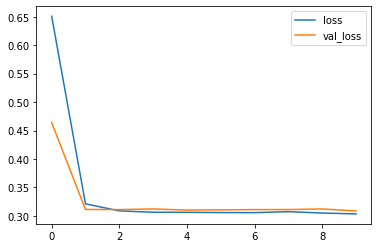

In [80]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

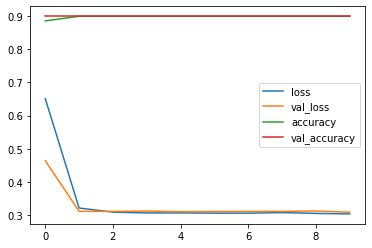

In [81]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

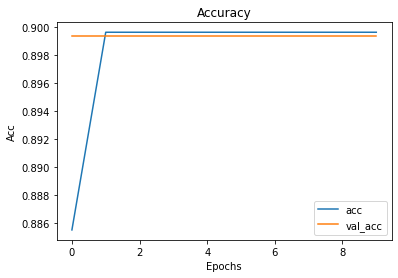

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

## 배운 내용 정리
1. 딥러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 딥러닝 모델 DNN, CNN, RNN 모델 구축